In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import fastai
import pandas as pd
import statistics

In [2]:
df=pd.read_csv('ArtEmisv2.csv')
df

,emotion,art_style,painting
0,fear,Art_Nouveau_Modern,a.y.-jackson_algoma-in-november-1935
1,sadness,Post_Impressionism,a.y.-jackson_barns-1926
2,fear,Post_Impressionism,a.y.-jackson_barns-1926
3,fear,Post_Impressionism,a.y.-jackson_barns-1926
4,contentment,Post_Impressionism,a.y.-jackson_early-spring-quebec-1923
...,...,...,...
237993,anger,Expressionism,zinaida-serebriakova_young-moroccan-1932
237994,sadness,Expressionism,zinaida-serebriakova_young-moroccan-1932
237995,fear,Expressionism,zinaida-serebriakova_young-moroccan-1932
237996,sadness,Expressionism,zinaida-serebriakova_young-moroccan-1932


In [3]:
processed=df.groupby(["art_style","painting"])["emotion"].apply(statistics.mode).reset_index()
processed

,art_style,painting,emotion
0,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear
1,Abstract_Expressionism,aaron-siskind_feet-102-1957,disgust
2,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,disgust
3,Abstract_Expressionism,aaron-siskind_new-york-24-1988,fear
4,Abstract_Expressionism,aaron-siskind_new-york-city-w-1-1947,fear
...,...,...,...
51514,Ukiyo_e,utagawa-toyokuni_nakamura-utaemon-1,anger
51515,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,anger
51516,Ukiyo_e,utagawa-toyokuni_the-promenade,fear
51517,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,sadness


In [4]:
processed['path']= processed.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)
for i in processed.path:
    try:
        im=Image.open(i)
    except:
        processed=processed.drop(processed[processed.path==i].index)


C:\Users\Aren\anaconda3\envs\cupy\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [5]:
processed

,art_style,painting,emotion,path
0,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_chicago-6-1961.jpg
1,Abstract_Expressionism,aaron-siskind_feet-102-1957,disgust,dataset\wikiart\Abstract_Expressionism\aaron-siskind_feet-102-1957.jpg
2,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,disgust,dataset\wikiart\Abstract_Expressionism\aaron-siskind_kentucky-4-1951.jpg
3,Abstract_Expressionism,aaron-siskind_new-york-24-1988,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_new-york-24-1988.jpg
4,Abstract_Expressionism,aaron-siskind_new-york-city-w-1-1947,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_new-york-city-w-1-1947.jpg
...,...,...,...,...
51514,Ukiyo_e,utagawa-toyokuni_nakamura-utaemon-1,anger,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_nakamura-utaemon-1.jpg
51515,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,anger,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798.jpg
51516,Ukiyo_e,utagawa-toyokuni_the-promenade,fear,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_the-promenade.jpg
51517,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,sadness,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock.jpg


In [6]:
imageDB=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_x=ColReader('path'),
                  get_y=ColReader('emotion'),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


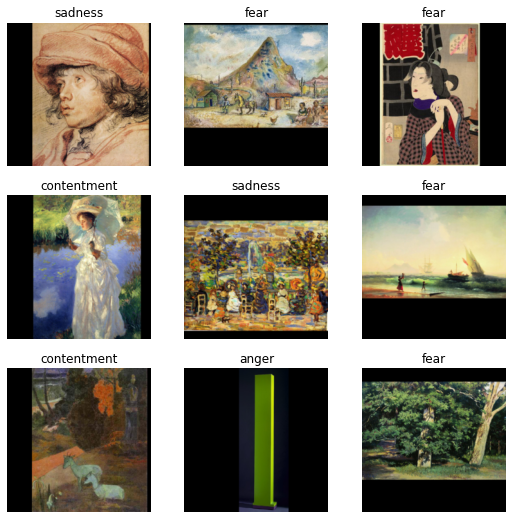

In [7]:
dls = imageDB.dataloaders(processed,bs=16)
dls.show_batch()

In [19]:
opt_func = partial(ranger)
model=xresnet34_deeper
learn = vision_learner(dls, model,pretrained=False,loss_func=LabelSmoothingCrossEntropyFlat() ,opt_func=opt_func)

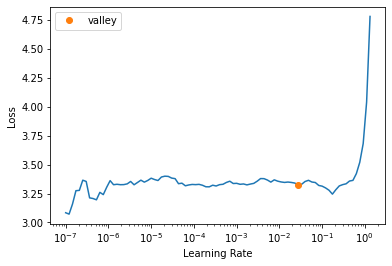

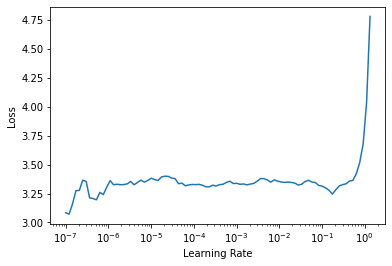

In [20]:
lr=learn.lr_find(suggest_funcs=(valley))
learn.recorder.plot_lr_find()

In [ ]:
learn.fit_flat_cos(30,lr,pct_start=0.75, cbs=[SaveModelCallback (monitor='valid_loss', 
                                                                  comp=None, 
                                                                  min_delta=0.0,
                                                                  fname='classification_model_xresnet34_deeper', 
                                                                  every_epoch=False,
                                                                  at_end=False,
                                                                  with_opt=False, 
                                                                  reset_on_fit=True)])

epoch,train_loss,valid_loss,time
